This notebook serves as evaluation for the Visualisation of TEP Study

In [1]:
import numpy as np
import pandas as pd
import csv
import statistics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# df contains the study results -> all answers to all questions, as well as timing and demographic data
df = pd.read_csv(r'C:\Users\lucag\Documents\VSCodeProjekte\cfrnet\results-survey948432.csv')

In [2]:
def listOfTuples2(l1, l2):
    return list(map(lambda x, y:(x,y), l1, l2))

This information identifies most regular question codes in the survey

In [3]:
patient_nrs = [23,77,530,956,1200,1549]
profile_nrs = [1,2,4,5,8,9,11,13,14,15,16,18]
profiles_not_included = [3, 6, 7, 10, 12, 17]
question_nrs = [1,2]
explanation_code = 77240
bw_ranking_code = 77241
demographic_code = 77242
additional_codes = [explanation_code, bw_ranking_code, demographic_code]
# question groups seems to be coded from 77220 onwards, adding the profile_nrs each time
question_group_code_base = 77220

First drop columns that are not needed for evaluation, such as in-survey timer questions, question Times that have no data in them and columns that are simply not required

In [4]:
df = df.loc[:,~df.columns.str.startswith('timer')]
df = df.loc[:,~df.columns.str.endswith('Time')]
df = df.drop(['submitdate', 'startlanguage', 'seed', 'startdate', 'datestamp', 'explanationText'], axis=1)
df = df.replace({'N': 0, 'Y': 1})



In [5]:
survey_finished = df['lastpage'] == 22
# drop all participant columns that did not finish the survey
df = df.drop(df[~survey_finished].index)

# drop all columns for the profiles that were not included
df = df.loc[:,~df.columns.str.startswith(tuple(['p'+ str(i) for i in profiles_not_included]))]

# drop all timing columns for profiles not included
not_included_profile_codes = ['groupTime' + str(77220 + i) for i in profiles_not_included]
df = df.drop(not_included_profile_codes, axis=1)



For each participant, how long did they take to answer each question group?

In [6]:

profile_codes = ['groupTime' + str(77220 + i) for i in profile_nrs]
gT_codes = ['groupTime' + str(i) for i in additional_codes]
df_participant_times = pd.concat([df['prolificID'], df[profile_codes], df[gT_codes]], axis=1)

df_participant_times

,prolificID,groupTime77221,groupTime77222,groupTime77224,groupTime77225,groupTime77228,groupTime77229,groupTime77231,groupTime77233,groupTime77234,groupTime77235,groupTime77236,groupTime77238,groupTime77240,groupTime77241,groupTime77242
0,6034cf3c1dac215c6fe31624,63.10,61.63,53.34,72.81,26.32,47.22,47.02,243.01,27.49,42.71,61.84,53.61,89.66,150.29,45.45
1,6545056177aaea7a1360248b,34.30,45.71,42.01,27.85,64.03,38.39,36.85,46.85,29.14,49.31,46.38,32.63,27.61,188.71,59.52
2,660d60a3bf19c9e899a604ec,109.42,332.21,73.71,123.45,450.84,121.93,542.51,127.74,126.80,115.78,36.92,102.73,170.21,260.01,139.17
3,60ce2a67096f614c9db45e2d,25.23,190.77,29.03,14.47,24.67,162.38,38.89,28.37,40.40,13.78,23.84,43.39,109.66,48.43,47.14
5,6159e8d7327e9932b6cc3333,21.07,40.10,23.54,18.09,43.74,40.10,37.64,50.96,18.00,26.59,20.62,25.11,9.65,101.11,46.44
6,6671115bc37c6099480f26d8,20.54,10.58,10.51,25.12,9.48,14.77,15.22,12.50,31.46,10.54,8.65,12.24,12.06,160.27,34.78
8,667aeedc2b71d2e4e909500c,37.95,24.64,73.43,54.88,39.25,361.94,49.51,67.20,35.81,74.45,26.68,24.97,20.75,432.97,59.19
9,6692e31256acd13e7080630a,67.92,21.75,7.96,14.30,10.59,15.99,30.89,11.73,8.39,30.80,9.55,40.36,139.56,88.00,45.95
10,66ab8dced18ca2861544fc5c,35.38,43.18,76.50,39.61,43.57,46.37,38.02,55.08,43.39,38.53,57.79,80.06,61.44,644.84,82.57
11,6689639eb49ffdec924b6838,24.37,32.26,26.92,42.64,36.23,34.54,35.64,42.24,47.53,27.44,27.86,40.01,142.64,285.64,62.83


How long did each question group on average take to answer?

In [7]:
mean_time_values = []
std_time_values = []

profile_group_codes = [question_group_code_base + nr for nr in profile_nrs]
# add times for the profiles
for p in profile_group_codes:
    df_timers = df.loc[:,df.columns.str.endswith(str(p))]
    values = df_timers.values[:,0].tolist()
    mean_time_values.append(statistics.mean(values))
    std_time_values.append(np.std(values))

# add times for the other question groups
for p in additional_codes:
    df_timers = df.loc[:,df.columns.str.endswith(str(p))]
    values = df_timers.values[:,0].tolist()
    mean_time_values.append(statistics.mean(values))
    std_time_values.append(np.std(values))

print('Mean time values for each question group:', mean_time_values)
print('Standard deviation time values for each question group:', std_time_values)

# this is to check if any participant had survey times that deviated from the mean by more than 2 or 3 standard deviations
df_timers = df.loc[:,df.columns.str.startswith('interviewtime')]
df_timers = df_timers.set_index(np.array(range(32)), drop=True)

for part in range(32):
    dropped_part = df_timers['interviewtime'].drop(part, axis=0)

    mean = np.mean(dropped_part)
    std = np.std(dropped_part)
    minimum = mean - std *2
    if(df_timers['interviewtime'][part] < minimum):
        print(df_timers['interviewtime'][part], ' is too low of a study time!!')




Mean time values for each question group: [42.7121875, 61.0925, 47.8434375, 42.905, 54.601875, 57.394375, 57.4371875, 56.8278125, 41.710625, 44.505, 46.03875, 43.2875, 87.52, 189.3778125, 56.1625]
Standard deviation time values for each question group: [28.78055406155072, 73.21402845425185, 31.145100598787504, 27.442785937291426, 76.11999332622393, 65.2598375695908, 90.75122682484708, 45.143586735436116, 27.706330158636582, 28.062060686984484, 28.40300135439035, 26.078273883637316, 60.98037240579956, 142.351917569943, 23.69466052721583]


For each profile calculate the average question results

Maybe add boxplots for the results or other means of visualisation

In [8]:
mean_q2_values = []
std_q2_values = []
nr_q2_values = []
mean_q1_values = []
std_q1_values = []

for p in profile_nrs:
    df_q1 = df.loc[:,df.columns.str.startswith('p'+str(p)+'q1')]
    values_q1 = [df_q1.iloc[tuple(index)] for index in np.argwhere(~pd.isnull(df_q1.values)).tolist()]
    mean_q1_values.append(np.mean(values_q1))
    std_q1_values.append(np.std(values_q1))

    df_q2 = df.loc[:,df.columns.str.startswith('p'+str(p)+'q2')]
    df_q2 = df_q2.replace({'AO01': 1, 'AO02': 2, 'AO03': 3, 'AO04': 4, 'AO05': 5, 'AO06': 6, 'AO07': 7, 'AO08': 8, 'AO09': 9, 'AO10': 10})
    
    values_q2 = [df_q2.iloc[tuple(index)] for index in np.argwhere(~pd.isnull(df_q2.values)).tolist()]
    nr_q2_values.append(len(values_q2))
    mean_q2_values.append(statistics.mean(values_q2))
    std_q2_values.append(np.std(values_q2))


print('Mean values for question 1:', mean_q1_values)
print('Standard deviation values for question 1:',std_q1_values)

print('All values here should match participant number:', nr_q2_values)
print('Mean values for question 2:', mean_q2_values)
print('Standard deviation values for question 2:',std_q2_values)




Mean values for question 1: [0.46875, 0.5625, 0.75, 0.78125, 0.78125, 0.78125, 0.625, 0.5625, 0.65625, 0.8125, 0.6875, 0.78125]
Standard deviation values for question 1: [0.4990224819584785, 0.49607837082461076, 0.4330127018922193, 0.41339864235384227, 0.41339864235384227, 0.41339864235384227, 0.4841229182759271, 0.49607837082461076, 0.47495887979908324, 0.3903123748998999, 0.46351240544347894, 0.41339864235384227]
All values here should match participant number: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Mean values for question 2: [5.375, 6.75, 7.0625, 7.21875, 6.59375, 6.40625, 5.875, 5.5, 5.3125, 5.75, 5.78125, 6.65625]
Standard deviation values for question 2: [2.4717149916606487, 2.5248762345905194, 2.3040385738958453, 1.8830556118978536, 2.13394258064738, 2.1774321889556054, 2.582997289971478, 2.5124689052802225, 2.542605700850999, 2.345207879911715, 2.458840872748784, 1.96229099205495]


Visualise the relation between decision and helpfulness rating for profile averages

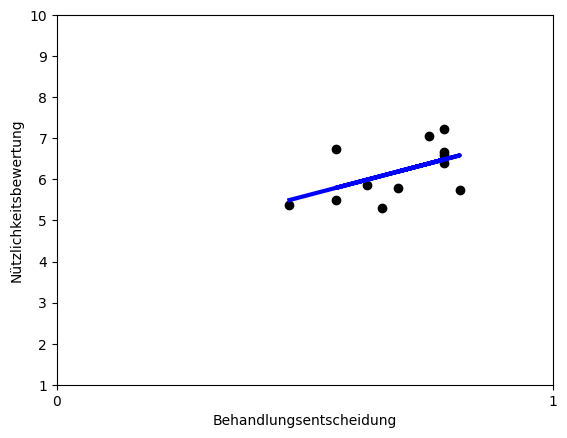

In [9]:
# reshape question average arrays to 
decision_flat = np.array(mean_q1_values).flatten().reshape(-1,1)
helpfulness_flat = np.array(mean_q2_values).flatten().reshape(-1,1)

lm = LinearRegression().fit(decision_flat, helpfulness_flat)
prediction = lm.predict(decision_flat)

plt.scatter(decision_flat, helpfulness_flat, color="black", alpha=1)
plt.plot(decision_flat, prediction, color="blue", linewidth=3)

plt.xticks((0,1))
plt.yticks((range(1,11)))

plt.xlabel('Behandlungsentscheidung')
plt.ylabel('Nützlichkeitsbewertung')

plt.show()

(array([0., 1.]), array([120, 264], dtype=int64))


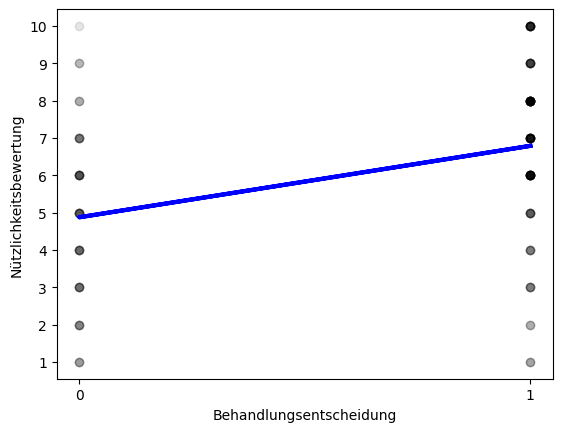

In [10]:
decision_vals = []
helpfulness_vals = []

for p in profile_nrs:
    df_profile_x = df.loc[:,df.columns.str.startswith('p'+str(p)+'q')]
    df_profile_x = df_profile_x.replace({'AO01': 1, 'AO02': 2, 'AO03': 3, 'AO04': 4, 'AO05': 5, 'AO06': 6, 'AO07': 7, 'AO08': 8, 'AO09': 9, 'AO10': 10})
    
    # values are composed of boolean values for treatment decision and helpfulness value between 1 and 10 alternately
    values = [df_profile_x.iloc[tuple(index)] for index in np.argwhere(~pd.isnull(df_profile_x.values)).tolist()]
    iter_range = range(len(values))
    decision_vals_profile = [values[i] for i in iter_range if i % 2==0]
    helpfulness_vals_profile = [values[i] for i in iter_range if i % 2==1]

    decision_vals.append(decision_vals_profile)
    helpfulness_vals.append(helpfulness_vals_profile)


decision_flat = np.array(decision_vals).flatten().reshape(-1,1)
helpfulness_flat = np.array(helpfulness_vals).flatten().reshape(-1,1)
print(np.unique(decision_flat, return_counts=True))


lm = LinearRegression().fit(decision_flat, helpfulness_flat)

prediction = lm.predict(decision_flat)

plt.scatter(decision_flat, helpfulness_flat, color="black", alpha=0.05)
plt.plot(decision_flat, prediction, color="blue", linewidth=3)

plt.xticks((0,1))
plt.yticks((range(1,11)))

plt.xlabel('Behandlungsentscheidung')
plt.ylabel('Nützlichkeitsbewertung')

plt.show()

With the mean 10-Likert Scale Values, calculate the mean values for the different design options!

In [11]:
# fact_opt_dict contains for every option the indices of the profiles it appears in
keyList = ['effect', 'aggregate', 'features', 'marked_individual']
fact_opt_dict = {key: {} for key in keyList}


"""'aggregate': {'individual':[2,6,7,9], 'subgroup':[3,10,11,12], 'population':[1,4,5,8]},
'features': {'none':[1,6,11,12], 'one': [2,4,5,10], 'many': [3,7,8,9]},
'marked_individual': {'yes':[4,6,7,8,10,12], 'no':[1,2,3,5,9,11]}}"""

"""fact_opt_dict = {'effect':{'outcomes' : [1,2,4,5,11,18], 'teps': [8,9,13,14,15,16]},
                      'aggregate': {'individual':[2,9,11,14], 'subgroup':[4,15,16,18], 'population':[1,5,8,13]},
                      'features': {'none':[1,9,16,18], 'one': [2,5,8,15], 'many': [4,11,13,14]},
                       'marked_individual': {'yes':[5,9,11,13,15,18], 'no':[1,2,4,8,14,16]}}
"""

# fill mean_q2_values so the profile_nrs match up
#filled_q2_values = [mean_q2_values[i] if i in profile_nrs else 0 for i in range(18)]

# add to fact_opt_dict the profile indices in the mean value lists. They do not match the original profile nrs!!!

fact_opt_dict['effect'].setdefault('outcomes', []).append([0,1,2,3,6,11])
fact_opt_dict['effect'].setdefault('teps', []).append([4,5,6,8,9,10])
fact_opt_dict['aggregate'].setdefault('individual', []).append([1,5,6,8])
fact_opt_dict['aggregate'].setdefault('subgroup', []).append([2,9,10,11])
fact_opt_dict['aggregate'].setdefault('population', []).append([0,3,4,7])
fact_opt_dict['features'].setdefault('none', []).append([0,5,10,11])
fact_opt_dict['features'].setdefault('one', []).append([1,3,4,9])
fact_opt_dict['features'].setdefault('many', []).append([2,6,7,8])
fact_opt_dict['marked_individual'].setdefault('yes', []).append([3,5,6,7,9,11])
fact_opt_dict['marked_individual'].setdefault('no', []).append([0,1,2,4,8,10])
fact_opt_dict

mean_q2_values_array = np.array(mean_q2_values)

means_over_fact_opts = [[[np.mean(mean_q2_values_array[prof_list]) for prof_list in fact_opt_dict[fact_dict][opt_dict]] for opt_dict in fact_opt_dict[fact_dict].keys()] for fact_dict in fact_opt_dict.keys()] 
stds_over_fact_opts = [[[np.std(mean_q2_values_array[prof_list]) for prof_list in fact_opt_dict[fact_dict][opt_dict]] for opt_dict in fact_opt_dict[fact_dict].keys()] for fact_dict in fact_opt_dict.keys()]

print('These are the means for each of the factor options as sorted above')
means_over_fact_opts


These are the means for each of the factor options as sorted above


[[[6.489583333333333], [5.953125]],
 [[6.0859375], [6.3125], [6.171875]],
 [[6.0546875], [6.578125], [5.9375]],
 [[6.234375], [6.145833333333333]]]

How did judgements for any one patient change with different visualisation profiles?

In [12]:
nr_answers_prof_pat = pd.DataFrame()
perc_treatment_yes = pd.DataFrame()
mean_treatment_prob_per_patient = []


for p in patient_nrs:
    df_patient = df.loc[:,df.columns.str.endswith('q1p'+ str(p))]  # shape #Participants x # Profiles
    nans = sum(df_patient.isnull().sum().tolist()) # How many times has this patient NOT been in a question? 
    patient_appearances = 384 - nans
    answers_yn = np.unique(df_patient, return_counts=True)
    avg_answers = answers_yn[1][1] / patient_appearances
    mean_treatment_prob_per_patient.append(avg_answers)

    print('Patient',p,'appeared',patient_appearances, 'times in the study and would have been treated with chemo in ',avg_answers,'percent of cases')

    means_for_patients = df_patient.mean(axis=0)

    # How many times has a specific profile/patient combination been answered by the survey population?
    prof_pat_comb = 32 - df_patient.isnull().sum()
    values = df_patient
    nr_answers_prof_pat = pd.concat([nr_answers_prof_pat, prof_pat_comb])
    perc_treatment_yes = pd.concat([perc_treatment_yes, means_for_patients])



Patient 23 appeared 70 times in the study and would have been treated with chemo in  0.6571428571428571 percent of cases
Patient 77 appeared 58 times in the study and would have been treated with chemo in  0.8103448275862069 percent of cases
Patient 530 appeared 56 times in the study and would have been treated with chemo in  0.5357142857142857 percent of cases
Patient 956 appeared 74 times in the study and would have been treated with chemo in  0.7162162162162162 percent of cases
Patient 1200 appeared 72 times in the study and would have been treated with chemo in  0.6805555555555556 percent of cases
Patient 1549 appeared 54 times in the study and would have been treated with chemo in  0.7222222222222222 percent of cases


You can use this to analyse different patients in relation to each profile

In [13]:
row_names_generator = ['p'+ str(prof) + 'q1p1549' for prof in profile_nrs]
patient_to_analyse = patient_nrs[1]
perc_treatment_yes_patient = perc_treatment_yes.loc[row_names_generator]
nr_answers_prof_pat_patient = nr_answers_prof_pat.loc[row_names_generator]

x = pd.concat([perc_treatment_yes_patient, nr_answers_prof_pat_patient], axis=1)
x

,0,0
p1q1p1549,0.666667,6.0
p2q1p1549,1.000000,1.0
p4q1p1549,0.000000,1.0
p5q1p1549,1.000000,5.0
p8q1p1549,1.000000,6.0
p9q1p1549,0.750000,8.0
p11q1p1549,0.571429,7.0
p13q1p1549,0.500000,2.0
p14q1p1549,0.400000,5.0
p15q1p1549,1.000000,4.0


How do helpfulness and decision for chemotherapy correlate with each other for each shown visualisation?

How did the participants respond for different patients with the same visualisation?

In [ ]:

perc_treatment_yes_profile = pd.DataFrame()
perc_treatment_yes_mean = []
perc_treatment_yes_answers = []
perc_treatment_yes_std = []


df['confidenceAI[SQ001]'] = df['confidenceAI[SQ001]'].astype(int)

# depending on what you would want to analyse, distances can be fit
distances = [1]
means_by_split_vals = []
for split in distances:
    for p in profile_nrs:
        df_profile = df.loc[:,df.columns.str.startswith('p'+ str(p)+'q1')]  # shape #Participants x # Profiles
        
        df_flattened = df_profile.to_numpy().flatten()
        rem_nans = [df_flattened[i] for i in range(len(df_flattened)) if not np.isnan(df_flattened[i])]
        perc_treatment_yes_answers.append(rem_nans)

        #aa = np.unique(df_flattened, return_counts=True)

        perc_treatment_yes = np.mean(rem_nans)
        perc_treatment_yes_mean.append(perc_treatment_yes)

        nans = sum(df_patient.isnull().sum().tolist()) # How many times has this patient NOT been in a question? 
        patient_appearances = 384 - nans
        means_for_profile = df_profile.mean(axis=0)

        perc_treatment_yes_profile = pd.concat([perc_treatment_yes_profile, means_for_profile])

    means_by_split_vals.append(np.mean(perc_treatment_yes_mean))


print('Split Vals:', means_by_split_vals)

row_names_generator = ['p13q1p'+ str(pat) for pat in patient_nrs]
patient_to_analyse = profile_nrs[1]
perc_treatment_yes_profile = perc_treatment_yes_profile.loc[row_names_generator]
print('Average Propability of decision for chemo by profile:',perc_treatment_yes_mean) 
print('Mean avg probability:', np.mean(perc_treatment_yes_mean),'std avg probability:',np.std(perc_treatment_yes_mean))
print('Average standard deviation for propability of decision for chemo by profile:',perc_treatment_yes_std)


Split Vals: [0.6875]
Average Propability of decision for chemo by profile: [0.46875, 0.5625, 0.75, 0.78125, 0.78125, 0.78125, 0.625, 0.5625, 0.65625, 0.8125, 0.6875, 0.78125]
Mean avg probability: 0.6875 std avg probability: 0.10749878875286611
Average standard deviation for propability of decision for chemo by profile: []


Helpfulness of visualisations by demographic data

Average experience in oncology by experience in healthcare: [0.0, 1.0, 1.6666666666666667, 2.25, 1.2857142857142858, 2.0, 1.5, 2.5, 1.0, 6.0, 2.0, 2.5, 6.0, 10.0]
Average helpfulness by profile: [0.46875, 0.5625, 0.75, 0.78125, 0.78125, 0.78125, 0.625, 0.5625, 0.65625, 0.8125, 0.6875, 0.78125]
Mean avg probability: 0.6875 std avg probability: 0.10749878875286611
Average standard deviation for propability of decision for chemo by profile: []


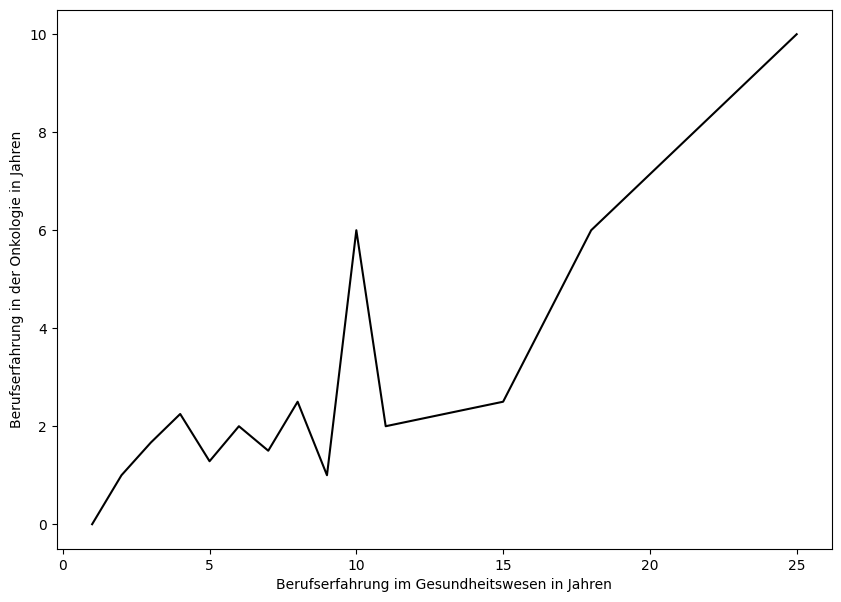

In [18]:
helpfulness_profile = pd.DataFrame()
helpfulness_profile_mean = []
helpfulness_profile_answers = []
helpfulness_profile_std = []
expH_O = []

distances = list(np.unique(df['experienceH']))

means_by_split_vals = []
for split in distances:
    a = df.loc[df['experienceH']  == split ]

    profile_nrs = [1]
    for p in profile_nrs:
        df_profile = a.loc[:, 'experienceO']

        df_q2 = df_profile.replace({'AO01': 1, 'AO02': 2, 'AO03': 3, 'AO04': 4, 'AO05': 5, 'AO06': 6, 'AO07': 7, 'AO08': 8, 'AO09': 9, 'AO10': 10})
    
        df_flattened = df_q2.to_numpy().flatten()
        rem_nans = [df_flattened[i] for i in range(len(df_flattened)) if not np.isnan(df_flattened[i])]
        helpfulness_profile_mean.append(np.mean(rem_nans, axis=0))

    expH_O.append(np.mean(helpfulness_profile_mean))
    helpfulness_profile_mean = []
    

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot( distances, expH_O, color= 'black')
plt.xlabel('Berufserfahrung im Gesundheitswesen in Jahren')
plt.ylabel('Berufserfahrung in der Onkologie in Jahren')

print('Average experience in oncology by experience in healthcare:', expH_O)
print('Average helpfulness by profile:',perc_treatment_yes_mean) 
print('Mean avg probability:', np.mean(perc_treatment_yes_mean),'std avg probability:',np.std(perc_treatment_yes_mean))
print('Average standard deviation for propability of decision for chemo by profile:',perc_treatment_yes_std)

Text(0, 0.5, 'Durchschnittliche angegebene Nützlichkeit')

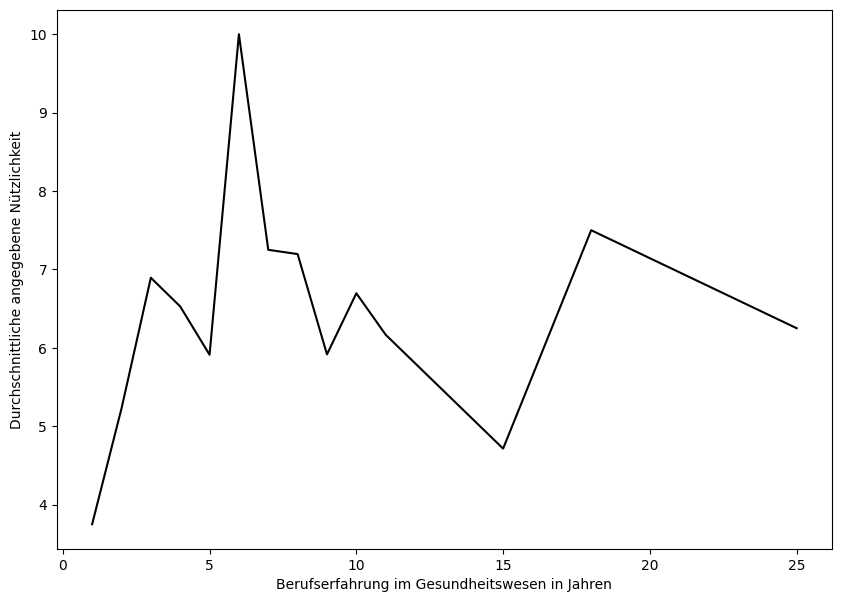

In [19]:
helpfulness_profile = pd.DataFrame()
helpfulness_profile_mean = []
helpfulness_profile_answers = []
helpfulness_profile_std = []
expH_O = []

profile_nrs = [1,2,4,5,8,9,11,13,14,15,16,18]

distances = list(np.unique(df['experienceH']))

means_by_split_vals = []
for split in distances:
    a = df.loc[df['experienceH']  == split ]
    for p in profile_nrs:
        # get all answers to question 2 for each profile and take their mean
        df_profile = a.loc[:,a.columns.str.startswith('p'+str(p)+'q2')]  # shape #Participants x # Profiles

        df_q2 = df_profile.replace({'AO01': 1, 'AO02': 2, 'AO03': 3, 'AO04': 4, 'AO05': 5, 'AO06': 6, 'AO07': 7, 'AO08': 8, 'AO09': 9, 'AO10': 10})
        # this can be done because the means_for_profile instances all contain the same number of values for any split group. 
        # In this case the average over averages matches the average over all values
        means_for_profile = np.mean(df_q2, axis=0) #df_q2.mean(axis=0)
        helpfulness_profile = pd.concat([helpfulness_profile, means_for_profile])

    means_by_split_vals.append(np.mean(helpfulness_profile, axis=0))
    helpfulness_profile_mean = []
    helpfulness_profile = pd.DataFrame()
    
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot( distances, means_by_split_vals, color= 'black')
plt.xlabel('Berufserfahrung im Gesundheitswesen in Jahren')
plt.ylabel('Durchschnittliche angegebene Nützlichkeit')


[0.0, 1.0, 1.5, 2.0, 3.0, 5.0, 6.0, 10.0]


Text(0, 0.5, 'Durchschnittliche angegebene Nützlichkeit')

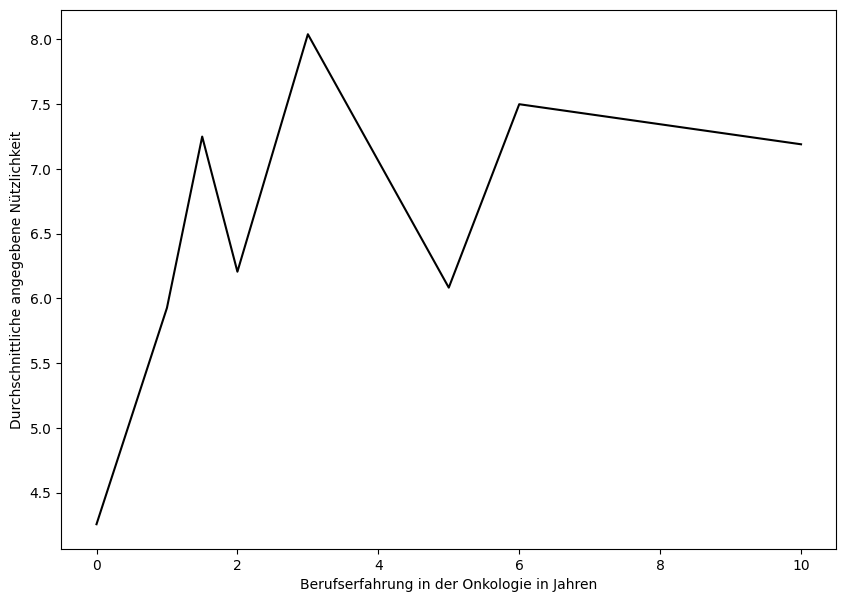

In [17]:
helpfulness_profile = pd.DataFrame()
helpfulness_profile_mean = []
helpfulness_profile_answers = []
helpfulness_profile_std = []
expH_O = []

profile_nrs = [1,2,4,5,8,9,11,13,14,15,16,18]

#df_demographic = df.loc[:,'gender': 'interviewtime']
#df_confidence = df_demographic.iloc[:, 'confidenceAI[SQ001]']

df['confidenceAI[SQ001]'] = df['confidenceAI[SQ001]'].astype(int)
distances = list(np.unique(df['experienceO']))
#distances = [25,35,45,55,65]
#distances = [1]
print(distances)
means_by_split_vals = []
for split in distances:
    #a = df.loc[(df['age']  <= split + 5) & (df['age']  >= split-4)]
    # filter for all study participants that fulfull th
    a = df.loc[df['experienceO']  == split ]
    #a = df
    #arr_confidence = df_confidence.to_numpy(.flatten)
    #profile_nrs = [1]
    for p in profile_nrs:
        # get all answers to question 2 for each profile and take their mean
        df_profile = a.loc[:,a.columns.str.startswith('p'+str(p)+'q2')]  # shape #Participants x # Profiles

        df_q2 = df_profile.replace({'AO01': 1, 'AO02': 2, 'AO03': 3, 'AO04': 4, 'AO05': 5, 'AO06': 6, 'AO07': 7, 'AO08': 8, 'AO09': 9, 'AO10': 10})
        # this can be done because the means_for_profile instances all contain the same number of values for any split group. 
        # In this case the average over averages matches the average over all values
        means_for_profile = np.mean(df_q2, axis=0) #df_q2.mean(axis=0)
        helpfulness_profile = pd.concat([helpfulness_profile, means_for_profile])

    means_by_split_vals.append(np.mean(helpfulness_profile, axis=0))
    helpfulness_profile_mean = []
    helpfulness_profile = pd.DataFrame()
    
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot( distances, means_by_split_vals, color= 'black')
plt.xlabel('Berufserfahrung in der Onkologie in Jahren')
plt.ylabel('Durchschnittliche angegebene Nützlichkeit')


Text(0, 0.5, 'Durchschnittliche angegebene Nützlichkeit (Skala von 1 bis 10)')

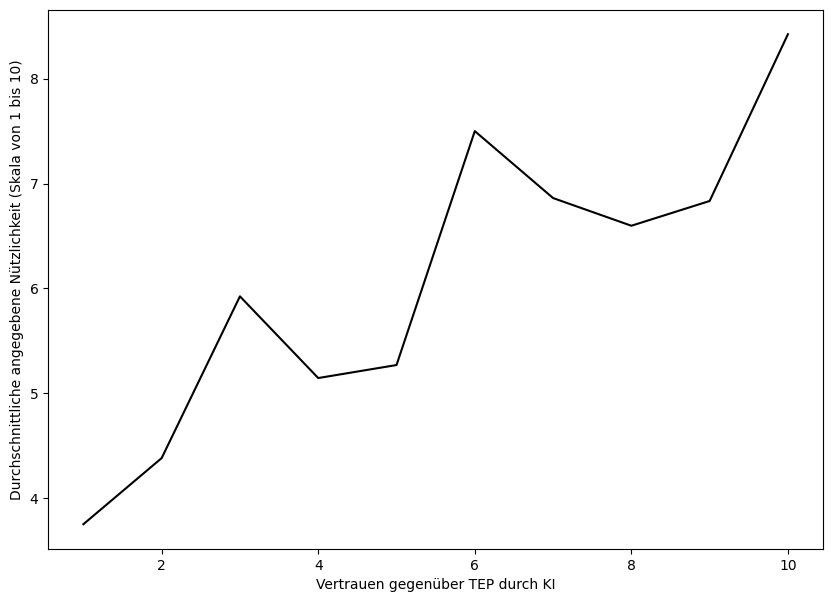

In [18]:
helpfulness_profile = pd.DataFrame()
helpfulness_profile_mean = []
helpfulness_profile_answers = []
helpfulness_profile_std = []

df['confidenceAI[SQ001]'] = df['confidenceAI[SQ001]'].astype(int)
distances = list(np.unique(df['confidenceAI[SQ001]']))

means_by_split_vals = []
for split in distances:
    a = df.loc[df['confidenceAI[SQ001]']  == split ]
    for p in profile_nrs:
        # get all answers to question 2 for each profile and take their mean
        df_profile = a.loc[:,a.columns.str.startswith('p'+str(p)+'q2')]  # shape #Participants x # Profiles

        df_q2 = df_profile.replace({'AO01': 1, 'AO02': 2, 'AO03': 3, 'AO04': 4, 'AO05': 5, 'AO06': 6, 'AO07': 7, 'AO08': 8, 'AO09': 9, 'AO10': 10})
        # this can be done because the means_for_profile instances all contain the same number of values for any split group. 
        # In this case the average over averages matches the average over all values
        means_for_profile = np.mean(df_q2, axis=0) #df_q2.mean(axis=0)
        helpfulness_profile = pd.concat([helpfulness_profile, means_for_profile])

    means_by_split_vals.append(np.mean(helpfulness_profile, axis=0))
    helpfulness_profile = pd.DataFrame()
    
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot( distances, means_by_split_vals, color= 'black')
plt.xlabel('Vertrauen gegenüber TEP durch KI')
plt.ylabel('Durchschnittliche angegebene Nützlichkeit (Skala von 1 bis 10)')


Text(0, 0.5, 'Durchschnittliche angegebene Nützlichkeit')

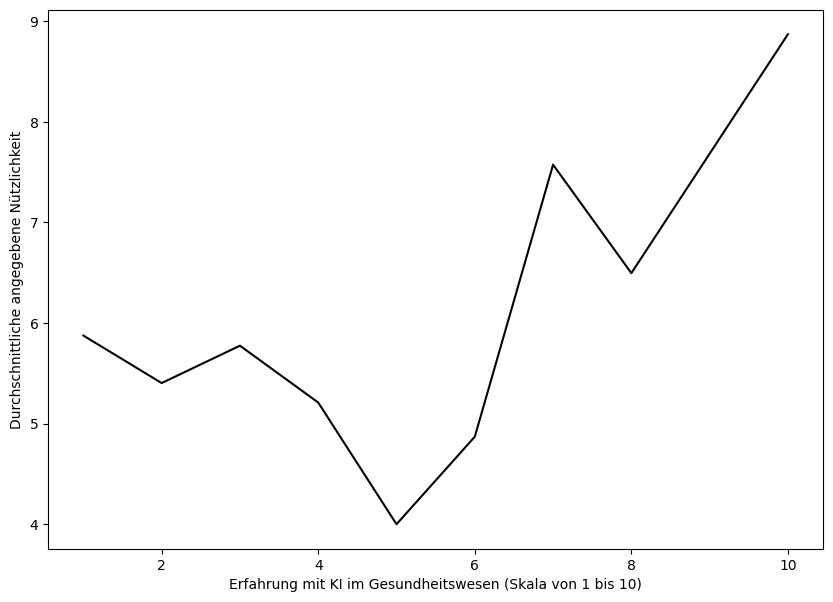

In [20]:
helpfulness_profile = pd.DataFrame()
helpfulness_profile_mean = []
helpfulness_profile_answers = []
helpfulness_profile_std = []
expH_O = []

profile_nrs = [1,2,4,5,8,9,11,13,14,15,16,18]
distances = list(np.unique(df['experienceAI[SQ001]']))

means_by_split_vals = []
for split in distances:
    a = df.loc[df['experienceAI[SQ001]']  == split ]
    for p in profile_nrs:
        # get all answers to question 2 for each profile and take their mean
        df_profile = a.loc[:,a.columns.str.startswith('p'+str(p)+'q2')]  # shape #Participants x # Profiles

        df_q2 = df_profile.replace({'AO01': 1, 'AO02': 2, 'AO03': 3, 'AO04': 4, 'AO05': 5, 'AO06': 6, 'AO07': 7, 'AO08': 8, 'AO09': 9, 'AO10': 10})
        # this can be done because the means_for_profile instances all contain the same number of values for any split group. 
        # In this case the average over averages matches the average over all values
        means_for_profile = np.mean(df_q2, axis=0) #df_q2.mean(axis=0)
        helpfulness_profile = pd.concat([helpfulness_profile, means_for_profile])

    means_by_split_vals.append(np.mean(helpfulness_profile, axis=0))
    helpfulness_profile_mean = []
    helpfulness_profile = pd.DataFrame()
    
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot( distances, means_by_split_vals, color= 'black')
plt.xlabel('Erfahrung mit KI im Gesundheitswesen (Skala von 1 bis 10)')
plt.ylabel('Durchschnittliche angegebene Nützlichkeit')


Text(0.5, 0, 'Angegebene Nützlichkeit je Profil')

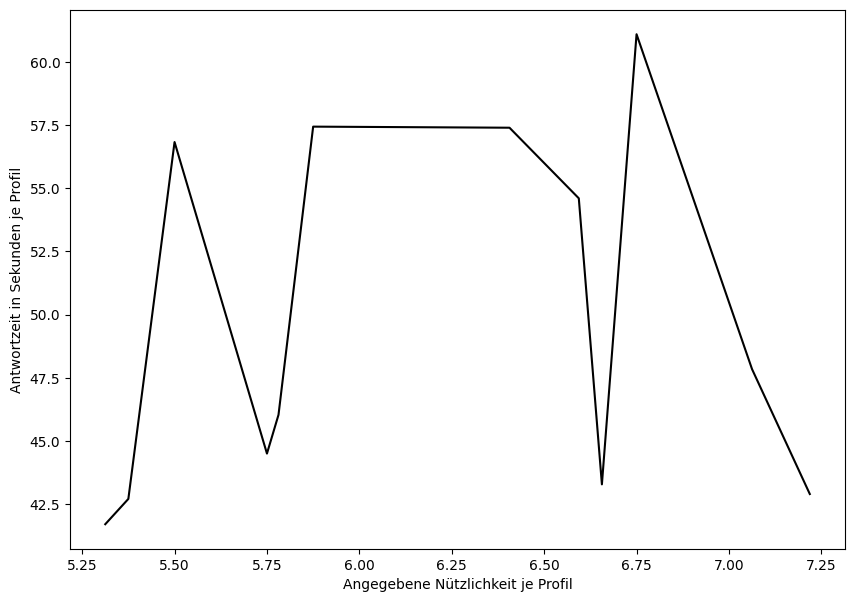

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 7))

a = listOfTuples2(mean_q2_values, mean_time_values)
sorted_a = sorted(a, key=lambda tup: tup[0])
sorted_mean_q2_values = [ x[0] for x in sorted_a]
sorted_mean_time_values = [ x[1] for x in sorted_a]

plt.plot(sorted_mean_q2_values, sorted_mean_time_values, color='black', label='Mittelwert je Profil (schwarz)')
plt.ylabel('Antwortzeit in Sekunden je Profil')

plt.xlabel('Angegebene Nützlichkeit je Profil')





Text(0.5, 0, 'Altersgruppen der Teilnehmer')

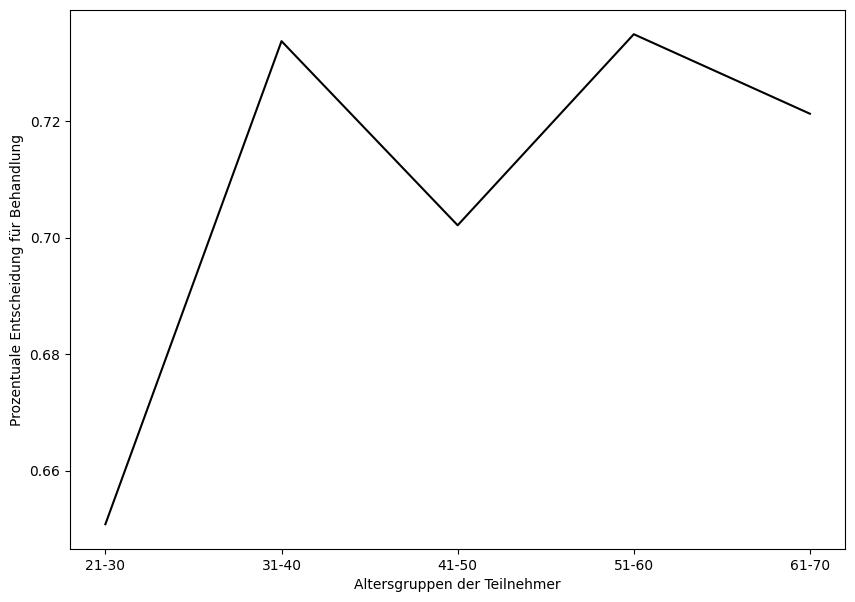

In [23]:
avg_probability_py_profile = [0.46875, 0.5625, 0.75, 0.78125, 0.78125, 0.78125, 0.625, 0.5625, 0.65625, 0.8125, 0.6875, 0.78125]

age_averages = [0.6507936507936508, 0.7337301587301587, 0.7021164021164021, 0.734920634920635, 0.7212698412698413]
ages =  ['21-30','31-40','41-50','51-60','61-70']

fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(ages,age_averages, color='black', label='Prozentuale Entscheidung für Behandlung (schwarz)')
ax1.set_ylabel('Prozentuale Entscheidung für Behandlung')
plt.xlabel('Altersgruppen der Teilnehmer')


Text(0.5, 0, 'Arbeitserfahrung in der Onkologie in Jahren')

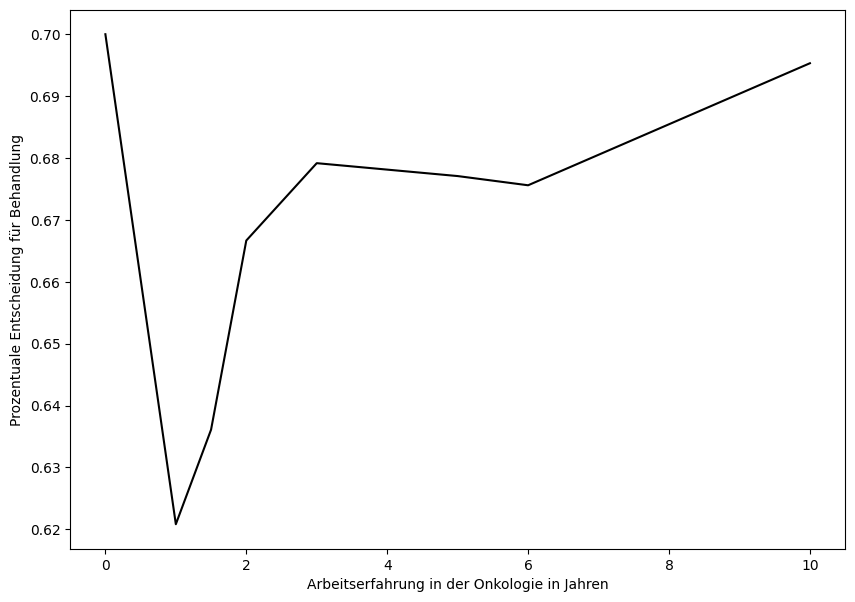

In [ ]:
experienceO_levels = [0.0, 1.0, 1.5, 2.0, 3.0, 5.0, 6.0, 10.0]
experienceO_averages = [0.6999999999999998, 0.6208333333333333, 0.6361111111111111, 0.6666666666666666, 0.6791666666666667, 0.6770833333333334, 0.6755952380952381, 0.6953125]

fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.plot(experienceO_levels,experienceO_averages, color='black', label='Prozentuale Entscheidung für Behandlung (schwarz)')
ax1.set_ylabel('Prozentuale Entscheidung für Behandlung')
plt.xlabel('Arbeitserfahrung in der Onkologie in Jahren')


Text(0.5, 0, 'Arbeitserfahrung im Gesundheitssektor in Jahren')

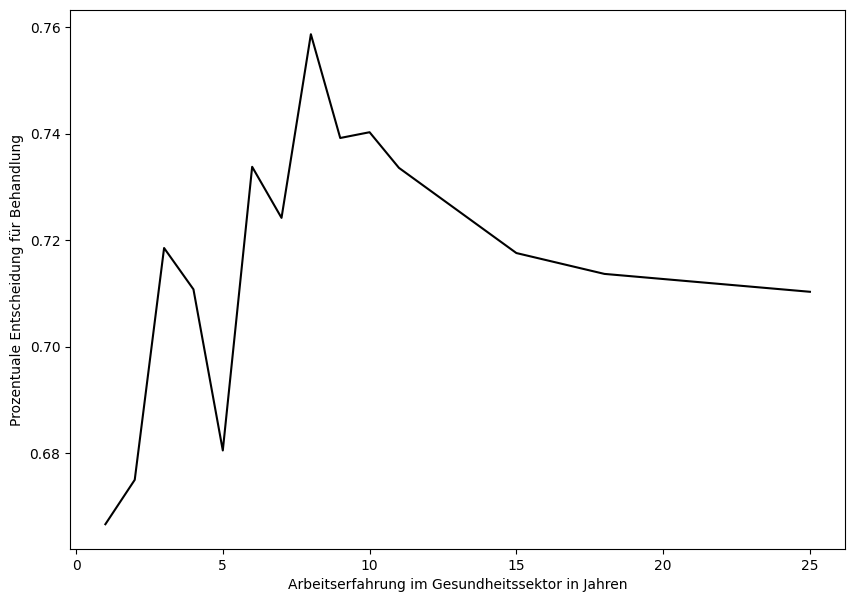

In [28]:

experienceH_averages = [0.6666666666666666, 0.6749999999999999, 0.7185185185185186, 0.7107638888888889, 0.680515873015873, 0.7337632275132275, 0.7241780045351474, 0.758655753968254, 0.7391754850088184, 0.7402579365079365, 0.733567821067821, 0.7175760582010582, 0.7136599511599512, 0.7103032879818594]
experienceH_levels = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 15.0, 18.0, 25.0]

fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.plot(experienceH_levels,experienceH_averages, color='black', label='Prozentuale Entscheidung für Behandlung (schwarz)')
ax1.set_ylabel('Prozentuale Entscheidung für Behandlung')
plt.xlabel('Arbeitserfahrung im Gesundheitssektor in Jahren')


Text(0, 0.5, 'Prozentuale Entscheidung für Behandlung (schwarz)')

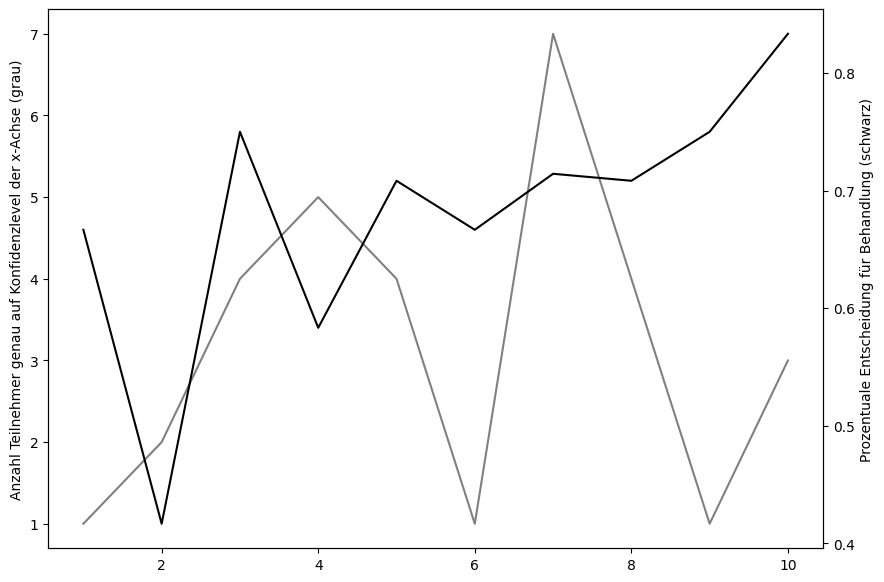

In [26]:
avg_probability_by_confidence_level = [0.6666666666666666, 0.4166666666666667, 0.75, 0.5833333333333334, 0.7083333333333334, 0.6666666666666666, 0.7142857142857143, 0.7083333333333334, 0.75, 0.8333333333333334]
nr_participants_by_confidence_level = [1, 2, 4, 5, 4, 1, 7, 4, 1, 3]

fig, ax1 = plt.subplots(figsize=(10, 7))
ax2 = ax1.twinx()

plt.xlabel('Angegebenes Vertrauen zu TEP durch KI')
ax1.plot(range(1, len(nr_participants_by_confidence_level)+1),nr_participants_by_confidence_level, color='grey', label='Standardabweichung je Profil (grau)')
ax1.set_ylabel('Anzahl Teilnehmer genau auf Konfidenzlevel der x-Achse (grau)')

ax2.plot(range(1, len(avg_probability_by_confidence_level)+1),avg_probability_by_confidence_level, color='black', label='Prozentuale Entscheidung für Behandlung (schwarz)')
ax2.set_ylabel('Prozentuale Entscheidung für Behandlung (schwarz)')



Text(0, 0.5, 'Prozentuale Entscheidung für Behandlung (schwarz)')

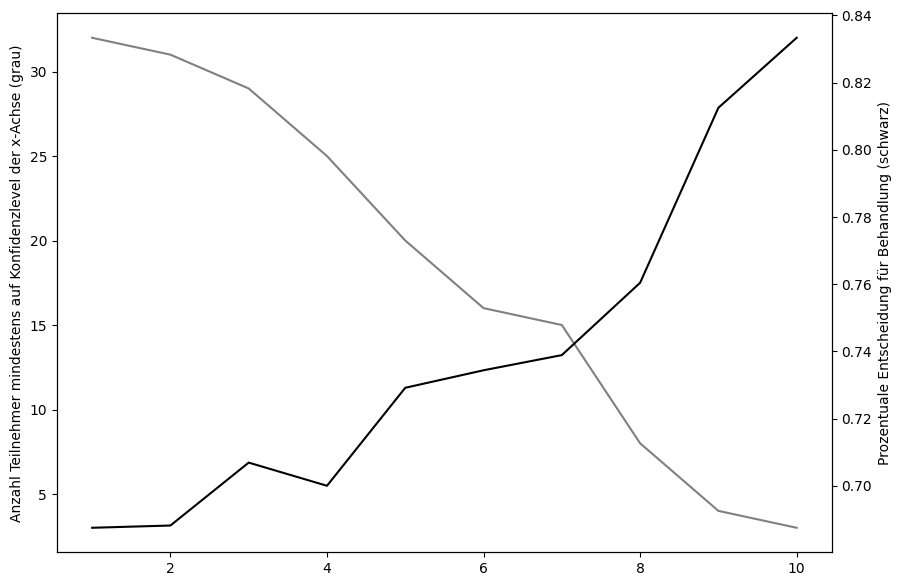

In [27]:


avg_probability_by_confidence = [0.6875, 0.6881720430107526, 0.7068965517241379, 0.7000000000000001, 0.7291666666666666, 0.734375, 0.7388888888888888, 0.7604166666666666, 0.8125, 0.8333333333333334]
nr_participants_by_confidence = [32, 31, 29, 25, 20, 16, 15, 8, 4, 3]


fig, ax1 = plt.subplots(figsize=(10, 7))
ax2 = ax1.twinx()

plt.xlabel('Angegebene Nützlichkeit je Profil')
ax1.plot(range(1, len(nr_participants_by_confidence)+1),nr_participants_by_confidence, color='grey', label='Standardabweichung je Profil (grau)')
ax1.set_ylabel('Anzahl Teilnehmer mindestens auf Konfidenzlevel der x-Achse (grau)')

ax2.plot(range(1, len(avg_probability_by_confidence)+1),avg_probability_by_confidence, color='black', label='Prozentuale Entscheidung für Behandlung (schwarz)')
ax2.set_ylabel('Prozentuale Entscheidung für Behandlung (schwarz)')



Text(0, 0.5, 'Mittelwert je Profil (schwarz)')

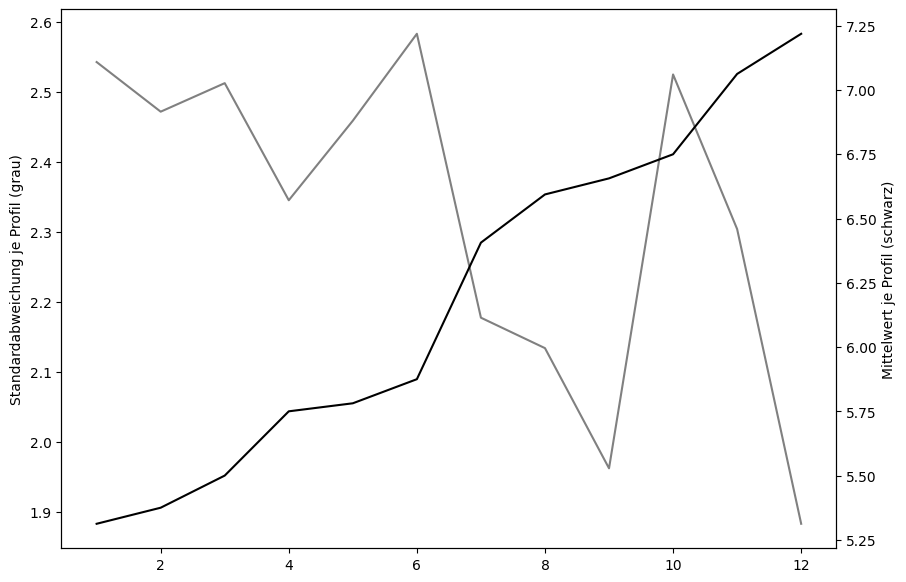

In [26]:
a = listOfTuples2(mean_q2_values, std_q2_values)

sorted_a = sorted(a, key=lambda tup: tup[0])
sorted_mean_q2_values = [ x[0] for x in sorted_a]
sorted_std_q2_values = [ x[1] for x in sorted_a]

fig, ax1 = plt.subplots(figsize=(10, 7))
ax2 = ax1.twinx()

plt.xlabel('Angegebene Nützlichkeit je Profil')
ax1.plot(range(1, len(sorted_std_q2_values)+1),sorted_std_q2_values, color='grey', label='Standardabweichung je Profil (grau)')
ax1.set_ylabel('Standardabweichung je Profil (grau)')

ax2.plot(range(1, len(sorted_mean_q2_values)+1),sorted_mean_q2_values, color='black', label='Prozentuale Entscheidung für Behandlung (schwarz)')
ax2.set_ylabel('Mittelwert je Profil (schwarz)')



Text(0, 0.5, 'Prozentuale Entscheidung für Behandlungsentscheidung je Profil (schwarz)')

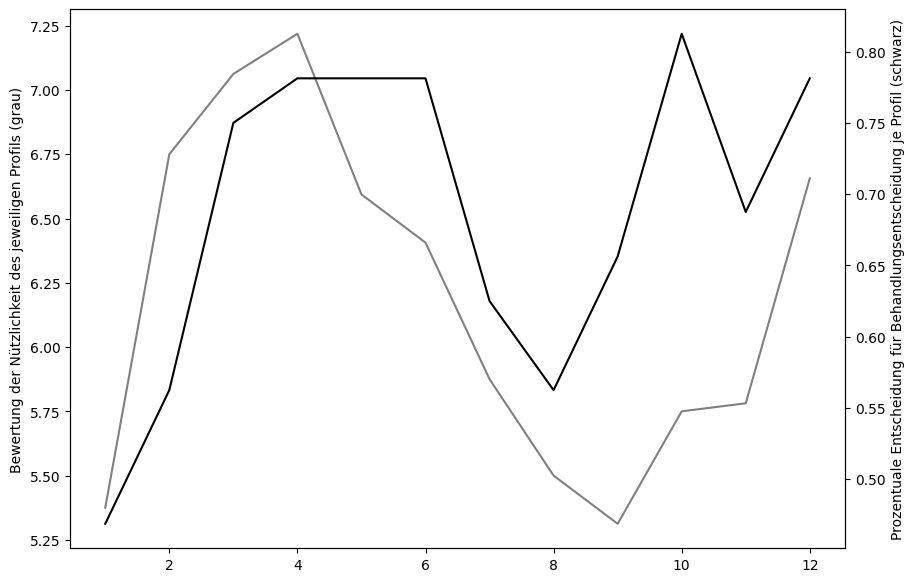

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax2 = ax1.twinx()

plt.xlabel('Angegebene Nützlichkeit je Profil')
ax1.plot(range(1, len(mean_q2_values)+1),mean_q2_values, color='grey', label='Standardabweichung je Profil (grau)')
ax1.set_ylabel('Bewertung der Nützlichkeit des jeweiligen Profils (grau)')

ax2.plot(range(1, len(mean_q1_values)+1),mean_q1_values, color='black', label='Prozentuale Entscheidung für Behandlung (schwarz)')
ax2.set_ylabel('Prozentuale Entscheidung für Behandlungsentscheidung je Profil (schwarz)')


With the yes-no answers to decision for chemotherapy, calculate average values for the different design options

In [ ]:

mean_q1_values_array = np.array(perc_treatment_yes_mean)

answers_q1_array = np.array(perc_treatment_yes_answers)
answer_means_over_fact_opts = [[[np.mean(answers_q1_array[prof_list])for prof_list in fact_opt_dict[fact_dict][opt_dict]] for opt_dict in fact_opt_dict[fact_dict].keys()] for fact_dict in fact_opt_dict.keys()]
answer_stds_over_fact_opts = [[[np.std(answers_q1_array[prof_list])for prof_list in fact_opt_dict[fact_dict][opt_dict]] for opt_dict in fact_opt_dict[fact_dict].keys()] for fact_dict in fact_opt_dict.keys()]
means_over_fact_opts = [[[np.mean(mean_q1_values_array[prof_list])for prof_list in fact_opt_dict[fact_dict][opt_dict]] for opt_dict in fact_opt_dict[fact_dict].keys()] for fact_dict in fact_opt_dict.keys()] # np.mean(mean_q2_values_array[prof_list])
stds_over_fact_opts = [[[np.std(mean_q1_values_array[prof_list]) for prof_list in fact_opt_dict[fact_dict][opt_dict]] for opt_dict in fact_opt_dict[fact_dict].keys()] for fact_dict in fact_opt_dict.keys()]

print(means_over_fact_opts)
answer_stds_over_fact_opts


[[[0.6614583333333334], [0.7239583333333334]], [[0.65625], [0.7578125], [0.6484375]], [[0.6796875], [0.734375], [0.6484375]], [[0.7239583333333334], [0.6510416666666666]]]


[[[0.4732137007708275], [0.44703765493586284]],
 [[0.47495887979908324], [0.42840718346422485], [0.4774581747061726]],
 [[0.46659661630122223], [0.4416654382844553], [0.4774581747061726]],
 [[0.44703765493586284], [0.4766407608782064]]]

Calculate Part Worths/Utility for the different factors

Absolute Part-Worths:  [[7.333333333333333, 4.166666666666667], [5.0, 6.25, 5.25], [4.75, 7.5, 4.25], [5.833333333333333, 5.166666666666667]]
Part-Worths:  [[1.583333333333333, -1.583333333333333], [-0.5, 0.75, -0.25], [-0.75, 2.0, -1.25], [0.33333333333333304, -0.33333333333333304]]
Absolute Attribute Importance:  [3.166666666666666, 1.25, 3.25, 0.6666666666666661]
Relative Attribute Importance:  [0.38, 0.15000000000000002, 0.39000000000000007, 0.07999999999999995]


[Text(0, 0, '0.38'),
 Text(0, 0, '0.15'),
 Text(0, 0, '0.39'),
 Text(0, 0, '0.08')]

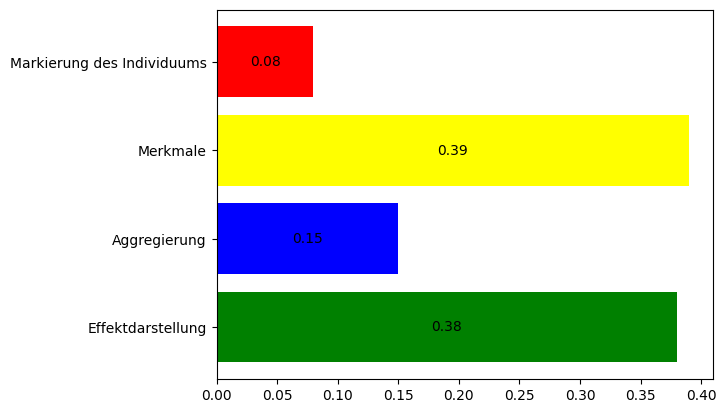

In [29]:
# this is the implicit ranking of all profiles through question 2, remember that profile numbers here (1-12) need to be mapped to the overall profile numbers (selection of 1-18)
ranked_q2_vals = sorted(range(len(mean_q2_values)), key=lambda k: mean_q2_values[k]) 

# use tuple list to map the ranking order from ranked_q2_vals to numbers from 1 to 12
list_of_tups = listOfTuples2( ranked_q2_vals, list(range(12)))

# sort the profiles back to a range of 0-11 and extract the ranks in their new order
sorted_ite_with_stds = sorted(list_of_tups, key=lambda tup: tup[0])

# ranks_in_profile_order contains the ranks in order of the profiles
ranks_in_profile_order = [x[1] for x in sorted_ite_with_stds]
rip_order = np.array(ranks_in_profile_order)

# now map the asserted ranks to the design factors
eans_over_fact_opts = [[[list(rip_order[prof_list]) for prof_list in fact_opt_dict[fact_dict][opt_dict]] for opt_dict in fact_opt_dict[fact_dict].keys()] for fact_dict in fact_opt_dict.keys()]

part_worths = [[ sum(b[0])/len(b[0])for b in i]for i in eans_over_fact_opts]
print('Absolute Part-Worths: ',part_worths)
fin_part_worths = [[pw - np.mean(fact_worth) for pw in fact_worth] for fact_worth in part_worths]

print('Part-Worths: ',fin_part_worths)
# now calculate attribute importance, first absolute then relative

# skalieren für 0 in der Mitte?
absolute_attribute_importance = [max(i) - min(i) for i in part_worths]
print('Absolute Attribute Importance: ', absolute_attribute_importance)

ai_sum = sum(absolute_attribute_importance)

relative_attribute_importance = [i / ai_sum for i in absolute_attribute_importance]
print('Relative Attribute Importance: ', relative_attribute_importance)

fig, ax = plt.subplots()

# for attribute importance

feat_names=['Effektdarstellung', 'Aggregierung', 'Merkmale', 'Markierung des Individuums']
attr_importance_colors = ['green', 'blue', 'yellow', 'red']
plt.yticks(ticks=range(len(relative_attribute_importance)), labels=feat_names)
bars = ax.barh(range(len(relative_attribute_importance)), relative_attribute_importance, color= attr_importance_colors)

ax.bar_label(bars, label_type='center')

[Text(0, 0, '1.583'),
 Text(0, 0, '-1.583'),
 Text(0, 0, '-0.5'),
 Text(0, 0, '0.75'),
 Text(0, 0, '-0.25'),
 Text(0, 0, '-0.75'),
 Text(0, 0, '2'),
 Text(0, 0, '-1.25'),
 Text(0, 0, '0.333'),
 Text(0, 0, '-0.333')]

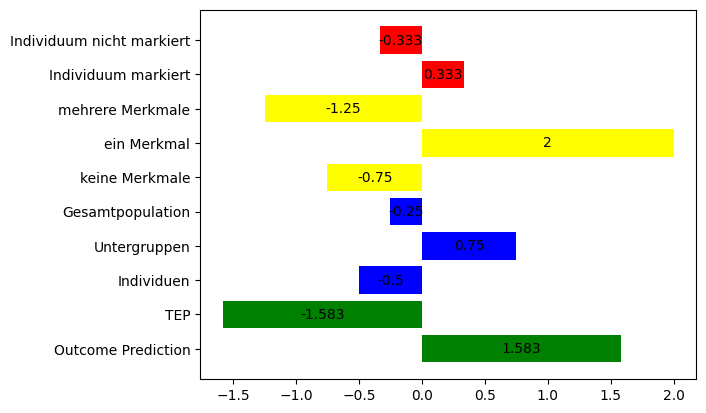

In [30]:
fig, ax = plt.subplots()
pw_list = []
[[pw_list.append(np.round(p1,3)) for p1 in p2 ]for p2 in fin_part_worths]

fact_opt_colors = ['green', 'green', 'blue', 'blue', 'blue', 'yellow', 'yellow', 'yellow', 'red', 'red']
fact_opt_names = ['Outcome Prediction', 'TEP', 'Individuen', 'Untergruppen', 'Gesamtpopulation', 'keine Merkmale', 'ein Merkmal', 'mehrere Merkmale', 'Individuum markiert', 'Individuum nicht markiert']
plt.yticks(ticks=range(len(fact_opt_names)), labels=fact_opt_names)

bars = ax.barh(range(len(fact_opt_names)), pw_list, color= fact_opt_colors)
ax.bar_label(bars, label_type='center')


Calculate Best-Worst Ranking Results

In [ ]:
cols = [ "r22[1]",	"r22[2]",	"r23[1]",	"r23[2]", "r24[1]",	"r24[2]", "r24[3]", "r42[1]", "r42[2]"]

df_bwranking = df.loc[:, cols]
d = df_bwranking.replace({'AO01': 1, 'AO02': 2, 'AO03': 3, 'AO04': 4, 'AO05': 5, 'AO06': 6, 'AO07': 7, 'AO08': 8, 'AO09': 9, 'AO10': 10})
ranking_counts = [np.unique(d.iloc[:,i], return_counts=True) for i in range(len(cols))]

ranking_counts


[(array([1, 2], dtype=int64), array([18, 14], dtype=int64)),
 (array([1, 2], dtype=int64), array([14, 18], dtype=int64)),
 (array([1, 2], dtype=int64), array([ 9, 23], dtype=int64)),
 (array([1, 2], dtype=int64), array([23,  9], dtype=int64)),
 (array([1, 2, 3], dtype=int64), array([ 5, 19,  8], dtype=int64)),
 (array([1, 2, 3], dtype=int64), array([10,  8, 14], dtype=int64)),
 (array([1, 2, 3], dtype=int64), array([17,  5, 10], dtype=int64)),
 (array([1, 2], dtype=int64), array([16, 16], dtype=int64)),
 (array([1, 2], dtype=int64), array([16, 16], dtype=int64))]

Evalute demographic data

In [ ]:
df_demographic = df.loc[:,'gender': 'interviewtime']

df_demographic = df_demographic.replace({'AO01': 'Male', 'AO02': 'Female', 'AO03': 3, 'AO04': 4, 'AO05': 5, 'AO06': 6, 'AO07': 7, 'AO08': 8, 'AO09': 9, 'AO10': 10})

demographic_counts = [np.unique(df_demographic.iloc[:,i], return_counts=True) for i in range(7)]
df_demographic
avg_age = np.mean(df_demographic.loc[:,'age'])
std_age = np.std(df_demographic.loc[:,'age'])
print('Average Participant Age: ', avg_age, ' with standard deviation: ', std_age)

avg_experienceH = np.mean(df_demographic.loc[:,'experienceH'])
std_experienceH = np.std(df_demographic.loc[:,'experienceH'])
print('Average Participant Experience in Healthcare: ', avg_experienceH, ' with standard deviation: ', std_experienceH)

avg_experienceO = np.mean(df_demographic.loc[:,'experienceO'])
std_experienceO = np.std(df_demographic.loc[:,'experienceO'])
print('Average Participant Experience in Oncology: ', avg_experienceO, ' with standard deviation: ', std_experienceO)

avg_aiexp = np.mean(df_demographic.loc[:,'experienceAI[SQ001]'])
std_aiexp = np.std(df_demographic.loc[:,'experienceAI[SQ001]'])
print('Average Participant experience with AI (1-10 scale): ', avg_aiexp, ' with standard deviation: ', std_aiexp)

avg_aiconf = np.mean(df_demographic.loc[:,'confidenceAI[SQ001]'])
std_aiconf = np.std(df_demographic.loc[:,'confidenceAI[SQ001]'])
print('Average Participant confidence in AI (1-10 scale): ', avg_aiconf, ' with standard deviation: ', std_aiconf)

avg_time = np.mean(df_demographic.loc[:,'interviewtime'])
std_time = np.std(df_demographic.loc[:,'interviewtime'])
print('Average participation time (seconds): ', avg_time, ' with standard deviation: ', std_time)


Average Participant Age:  31.90625  with standard deviation:  10.149998075738734
Average Participant Experience in Healthcare:  6.65625  with standard deviation:  5.253625979978019
Average Participant Experience in Oncology:  2.265625  with standard deviation:  2.391339762429212
Average Participant experience with AI (1-10 scale):  5.46875  with standard deviation:  2.6337280492678055
Average Participant confidence in AI (1-10 scale):  5.71875  with standard deviation:  2.465187302721641
Average participation time (seconds):  929.4165625  with standard deviation:  527.867859906775
